## SHREYOSHI GHOSH MACHINE LEARNING HW2

In [138]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [139]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen. 

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

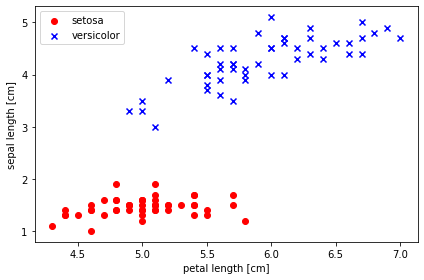

In [141]:
# plotting to show they are linearly separable
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Then Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

In [142]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

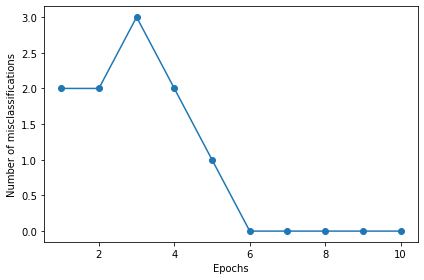

In [143]:
# RESULTS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

## RESULTS FOR PERCEPTRON
the above graph shows the loss curve, which displays that the model converges (i.e. the loss is minimized) at epoch 6

In [144]:
ada = AdalineGD(n_iter=200, eta=0.0001)

In [145]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada.fit(X_std,y)

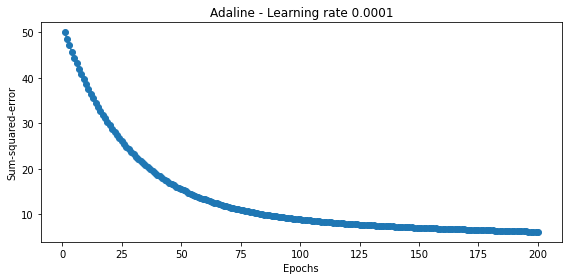

In [146]:
# RESULTS FOR ADA 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

## RESULTS FOR ADALINE 
the above graph shows the loss curve, which displays that the model converges (i.e. the loss is minimized) at around epoch 175

Repeat Step 4) using three features at a time.

In [147]:
# extract sepal and petal length, petal width
X3 = df.iloc[0:100, [0, 1, 2]].values
ppn3 = Perceptron(eta=0.1, n_iter=10)
ppn3.fit(X3, y)
ada3 = AdalineGD(n_iter=200, eta=0.0001)
X_std3 = np.copy(X3)
X_std3[:,0] = (X3[:,0] - X3[:,0].mean()) / X3[:,0].std()
X_std3[:,1] = (X3[:,1] - X3[:,1].mean()) / X3[:,1].std()
X_std3[:,2] = (X3[:,2] - X3[:,2].mean()) / X3[:,2].std()

ada3.fit(X_std3,y)

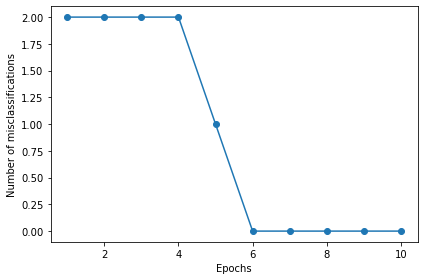

In [148]:
# PERCEPTRON
plt.plot(range(1, len(ppn3.errors_) + 1), ppn3.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

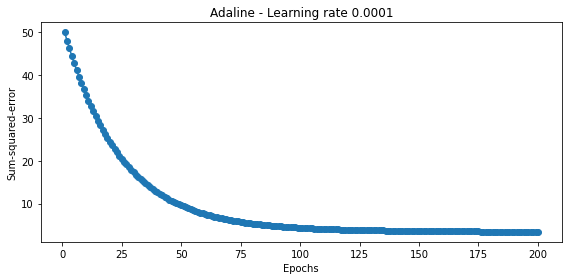

In [149]:
# ADALINE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

### RESULTS

PERCEPTRON: the graph shows that the model converges at epoch 6

ADALINE:the graph shows that the model converges at around epoch 100/125

Repeat Step 4) using all four features at the same time.

In [150]:
# extract sepal width & length, petal width & length
X4 = df.iloc[0:100, [0, 1, 2, 3]].values
ppn4 = Perceptron(eta=0.1, n_iter=10)
ppn4.fit(X4, y)
ada4 = AdalineGD(n_iter=200, eta=0.0001)
X_std4 = np.copy(X4)
X_std4[:,0] = (X4[:,0] - X4[:,0].mean()) / X4[:,0].std()
X_std4[:,1] = (X4[:,1] - X4[:,1].mean()) / X4[:,1].std()
X_std4[:,2] = (X4[:,2] - X4[:,2].mean()) / X4[:,2].std()
X_std4[:,3] = (X4[:,3] - X4[:,3].mean()) / X4[:,3].std()

ada4.fit(X_std4,y)

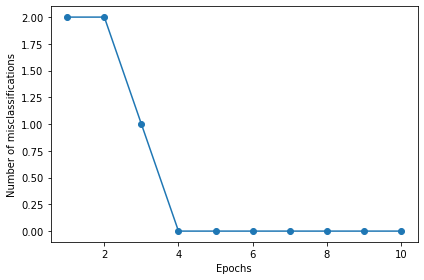

In [151]:
# PERCEPTRON
plt.plot(range(1, len(ppn4.errors_) + 1), ppn4.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

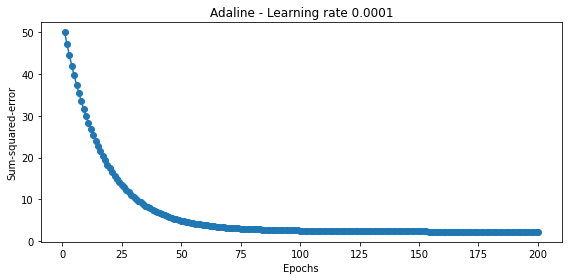

In [152]:
# ADALINE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

### RESULTS

PERCEPTRON: the graph shows that the model converges at epoch 4

ADALINE:the graph shows that the model converges at around epoch 100

Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are NOT linearly separable using the features that you have chosen. Then Apply the Perceptron and Adaline models to the classes/features that you have chosen and report your results.

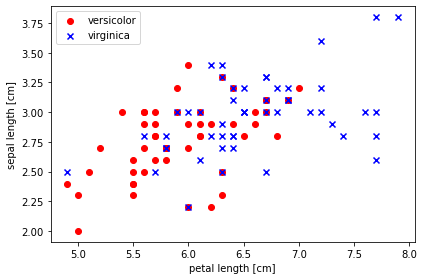

In [153]:
# if the error graph never converges for the perceptron, it indicates that for those combination of 
# features, the classes are not linearly separable
# trial and error, try diff combos 

# select virginica and versicolor
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length & width
X = df.iloc[50:150, [0,1]].values

# plotting to show they are NOT linearly separable
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [154]:
ppn = Perceptron(eta=0.1, n_iter=50)
ppn.fit(X, y)
ada = AdalineGD(n_iter=700, eta=0.0001)
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada.fit(X_std,y)

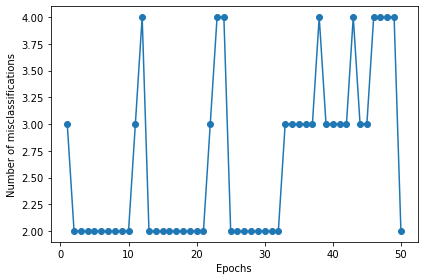

In [155]:
# RESULTS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

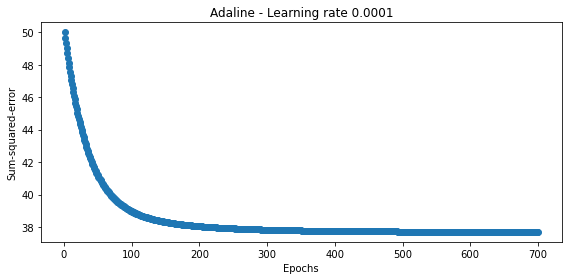

In [156]:
# ADALINE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

### RESULTS

PERCEPTRON: the graph shows that the model does not converge

ADALINE:the graph shows that the model converges at around epoch 500

Repeat Step 7) using three features at a time.

In [157]:
# extract sepal and petal length, petal width
X3 = df.iloc[50:150, [0, 1, 2]].values
ppn3 = Perceptron(eta=0.1, n_iter=10)
ppn3.fit(X3, y)
ada3 = AdalineGD(n_iter=750, eta=0.0001)
X_std3 = np.copy(X3)
X_std3[:,0] = (X3[:,0] - X3[:,0].mean()) / X3[:,0].std()
X_std3[:,1] = (X3[:,1] - X3[:,1].mean()) / X3[:,1].std()
X_std3[:,2] = (X3[:,2] - X3[:,2].mean()) / X3[:,2].std()

ada3.fit(X_std3,y)

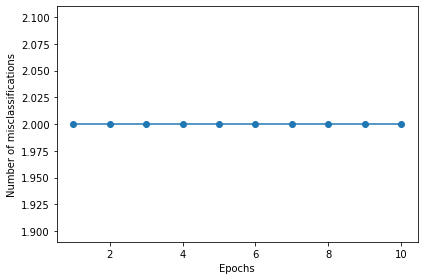

In [158]:
# PERCEPTRON
plt.plot(range(1, len(ppn3.errors_) + 1), ppn3.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

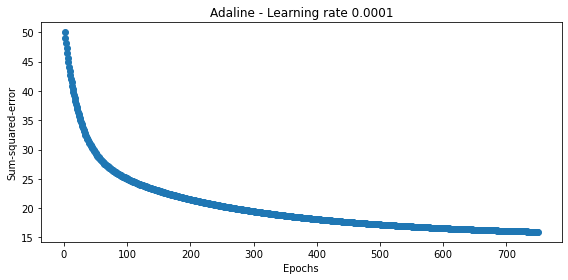

In [159]:
# ADALINE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

### RESULTS

PERCEPTRON: the graph shows that the model does not converge

ADALINE:the graph shows that the model converges at around epoch 600

Repeat Step 7) using all four features at the same time.

In [160]:
# extract sepal width & length, petal width & length
X4 = df.iloc[50:150, [0, 1, 2, 3]].values
ppn4 = Perceptron(eta=0.1, n_iter=10)
ppn4.fit(X4, y)
ada4 = AdalineGD(n_iter=750, eta=0.0001)
X_std4 = np.copy(X4)
X_std4[:,0] = (X4[:,0] - X4[:,0].mean()) / X4[:,0].std()
X_std4[:,1] = (X4[:,1] - X4[:,1].mean()) / X4[:,1].std()
X_std4[:,2] = (X4[:,2] - X4[:,2].mean()) / X4[:,2].std()
X_std4[:,3] = (X4[:,3] - X4[:,3].mean()) / X4[:,3].std()

ada4.fit(X_std4,y)

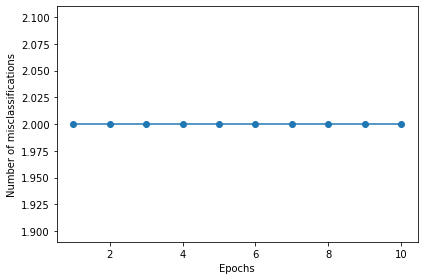

In [161]:
# PERCEPTRON
plt.plot(range(1, len(ppn4.errors_) + 1), ppn4.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

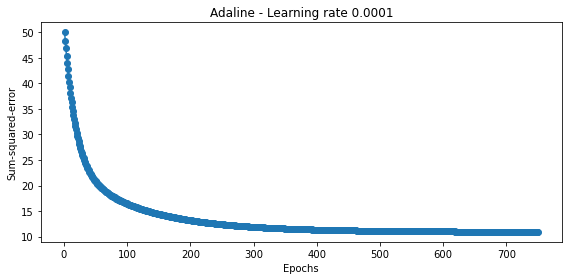

In [162]:
# ADALINE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

ax.plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

### RESULTS

PERCEPTRON: the graph shows that the model does not converge

ADALINE:the graph shows that the model converges at around epoch 400

## Compare your results for the Perceptron and Adaline models.  

Since it is difficult to ascertain linear separation visually using a plot when we have more than two features, I have relied on the fact that Percpetrons only converge when the data is linearly separable. 


Setosa vs Versicolor

When comparing Setosa and Versicolor, it seems that the two species are linearly separated, as indicated by the convergence when utilizing the Perceptron. The Perceptron and Adaline models when comparing Setosa and Versicolor seemed to converge earlier when using more features, indicating that they are siginificant in classification. With two features, the Perceptron converged at around 6 epochs and the Adaline converged at around epoch 175. With four features, the Perceptron converged at around 4 epochs and the Adaline converged at around epoch 100.

Virginica vs. Versicolor

When comparing Virginica and Versicolor, it seems that the two species are NOT linearly separated, as indicated by the lack of convergence in the Perceptron models. Regardless of the number of features, the Perceptron never converges when comparing these two species. However, the Adaline model does seem to improve with more features. With two features it converged at around epoch 500. With four features it converged at around epoch 400.
